In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

In [6]:
from wafflephi.statistics import linreg, fit

In [7]:
#* Get data from Stooq
df = pd.read_csv("https://stooq.com/q/d/l/?s=nvda.us&i=m")

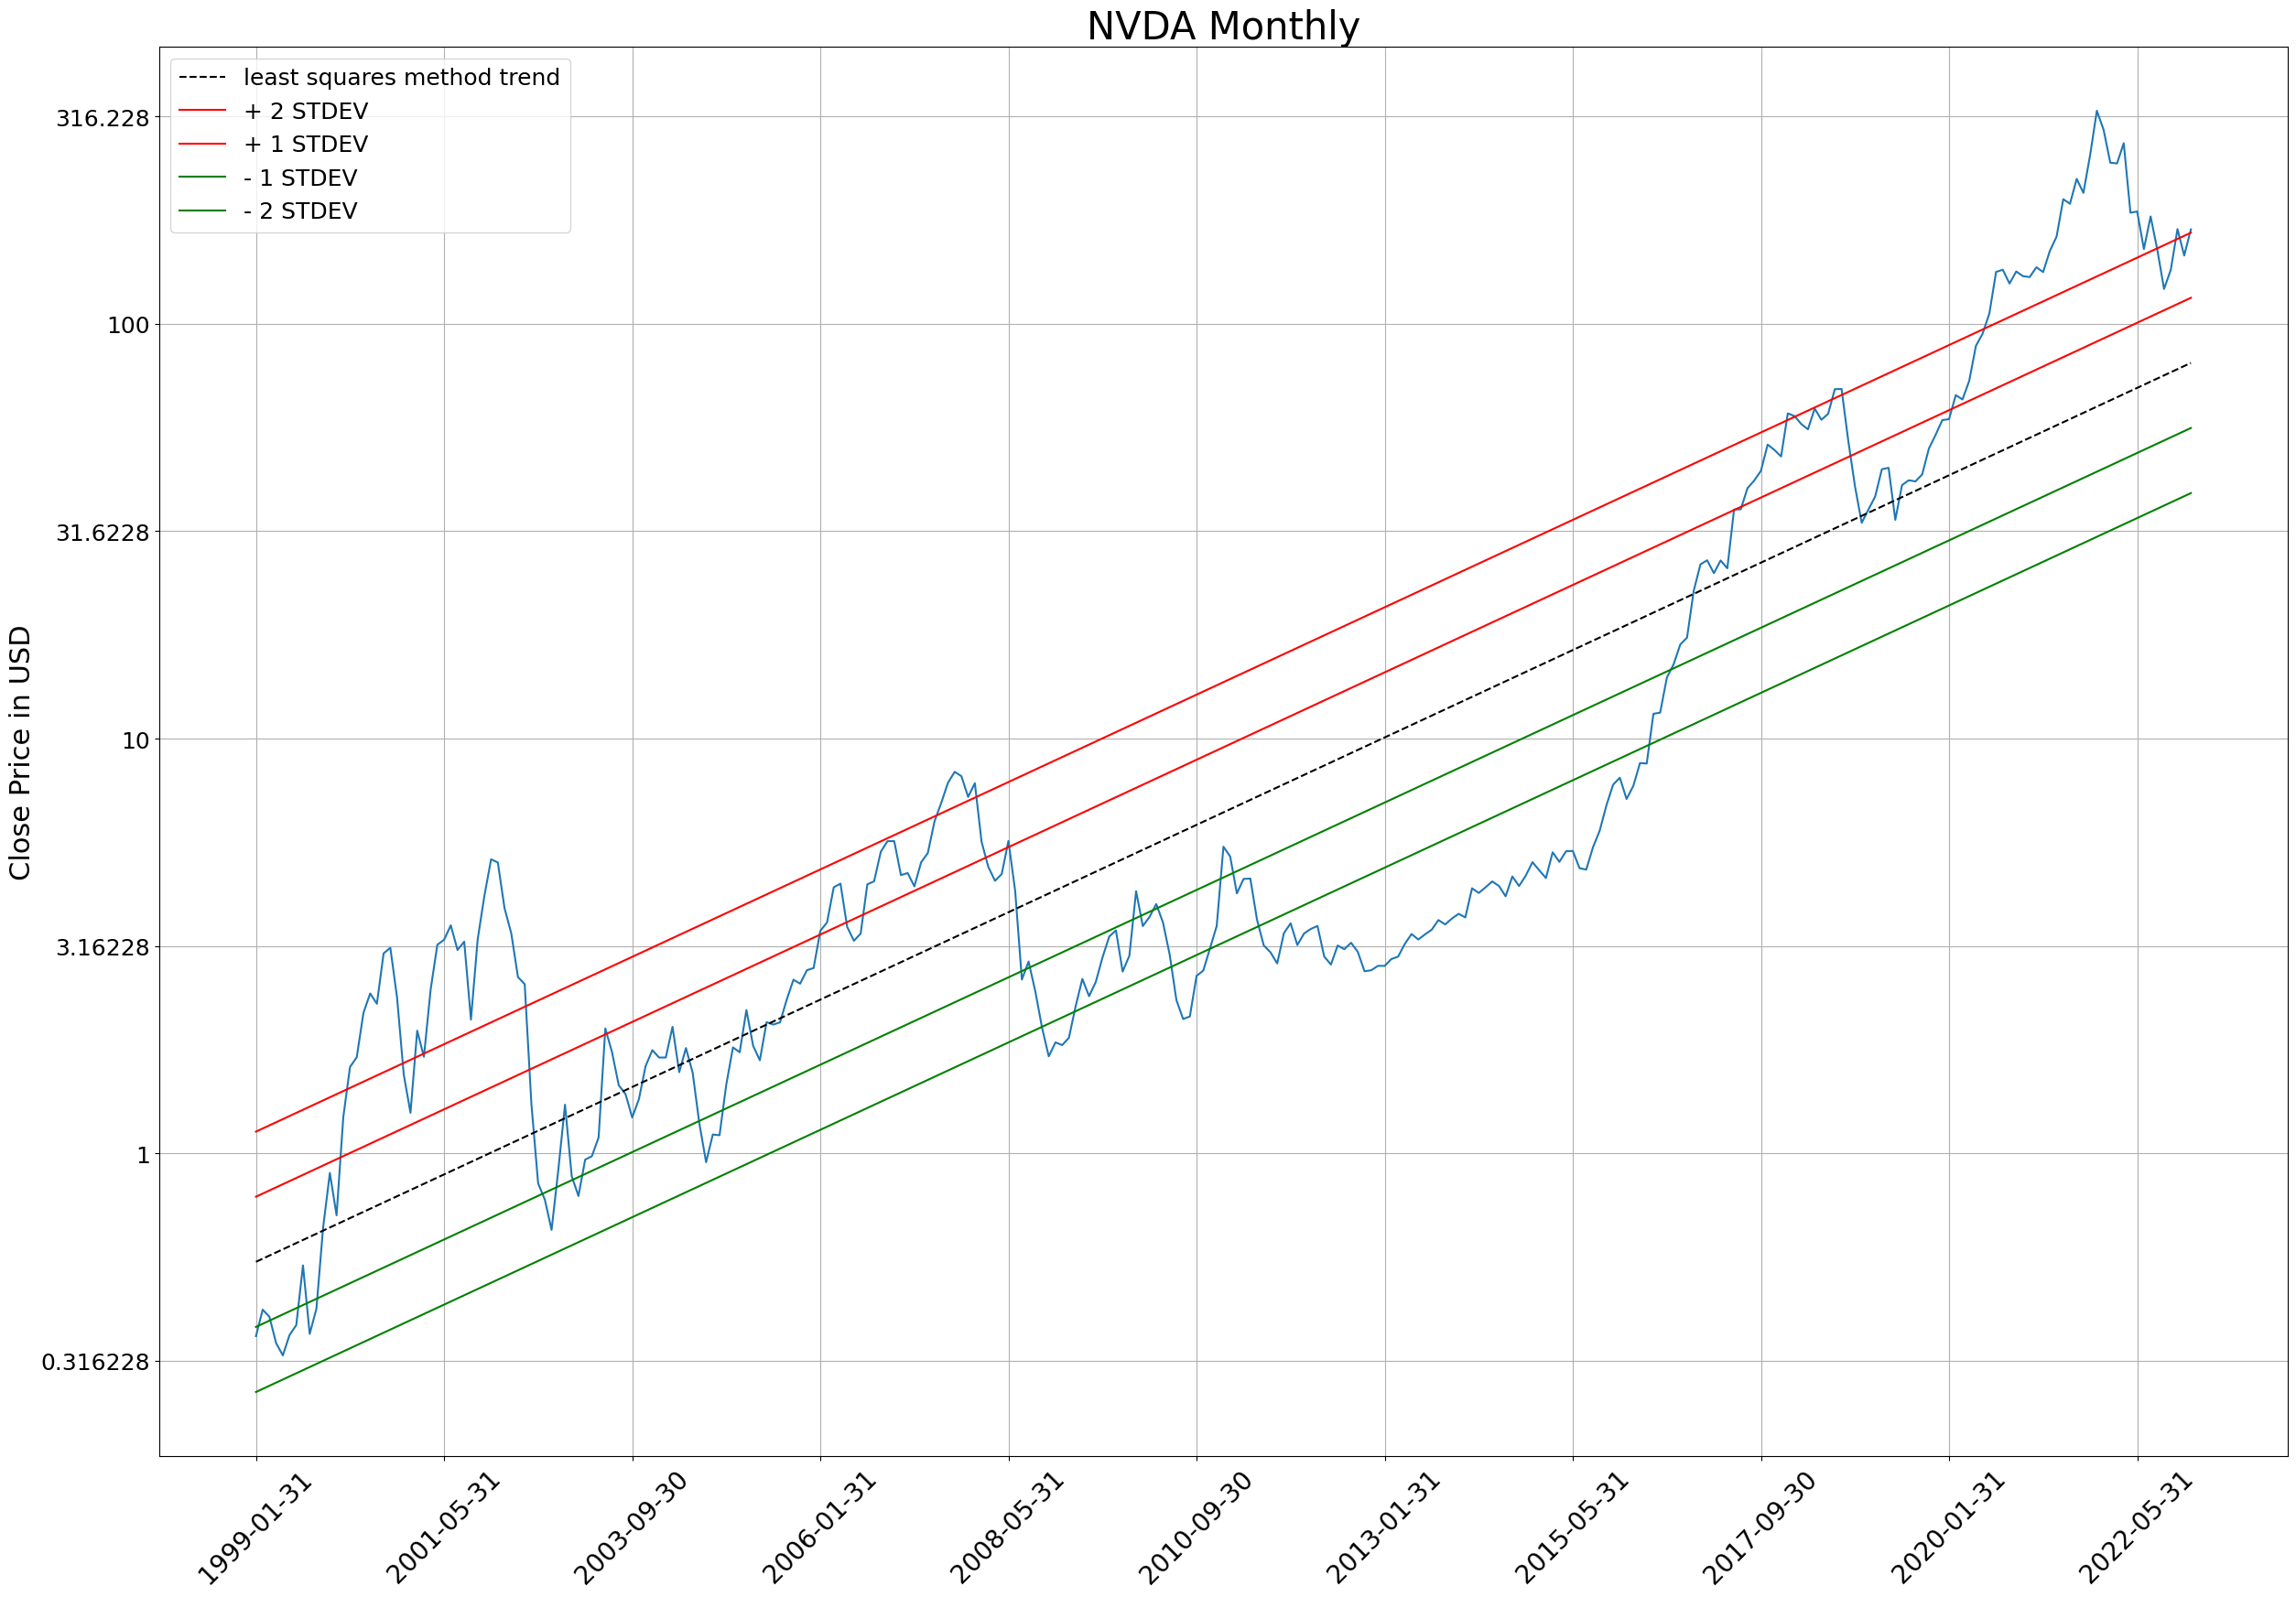

In [8]:
Y = np.log10(df['Close'])
X = range(df.shape[0])
l = linreg(X, Y)
est = fit(l, Y)

low = min(df['Close'])
high = max(df['Close'])

DATES_INTERVAL = df.shape[0]//10

fig, ax = plt.subplots(figsize=(30,20))


len_range = range(df.shape[0])
plt.plot(len_range, Y)
plt.plot(len_range, est, "--k", label="least squares method trend")
plt.plot(len_range, est + np.std(est)/2, "r", label="+ 2 STDEV")
plt.plot(len_range, est + np.std(est)/4, "r", label="+ 1 STDEV")
plt.plot(len_range, est - np.std(est)/4, "g", label="- 1 STDEV")
plt.plot(len_range, est - np.std(est)/2, "g", label="- 2 STDEV")


plt.yscale('linear')
legend = plt.legend(loc='upper left', fontsize=18)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(10**y)))


plt.xticks(range(0, df.shape[0], DATES_INTERVAL), df['Date'].loc[::DATES_INTERVAL], rotation=45, fontsize=20)
plt.yticks(fontsize=18)
plt.grid(True)
plt.title('NVDA Monthly', fontsize=30)
plt.ylabel('Close Price in USD', fontsize=22)
plt.show()